In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [2]:
dir(digits)
#

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data[1:2,:]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

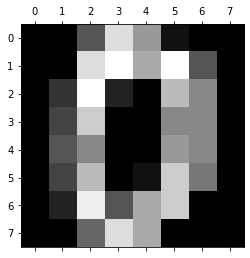

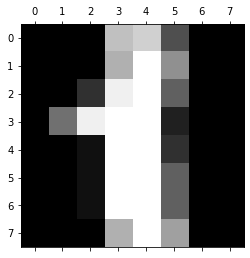

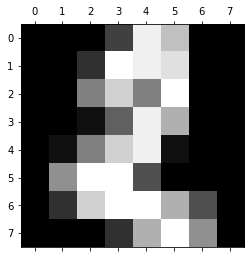

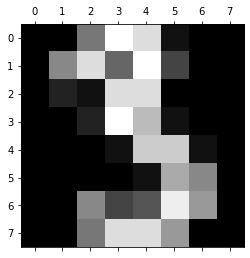

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [5]:
df = pd.DataFrame(digits.data)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=0.2)

In [10]:
len(x_train)

1437

In [11]:
len(x_test)

360

In [12]:
#ensemble means when we are using multiple algorithm to come to decision
from sklearn.ensemble import RandomForestClassifier


In [13]:
model=RandomForestClassifier(n_estimators=40)

In [14]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=40)

model.score(x_test,y_train)

In [15]:
model.score(x_test,y_test)

0.9611111111111111

In [16]:
y_predicted=model.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix


In [18]:
cm=confusion_matrix(y_test,y_predicted)

In [19]:
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  1,  0],
       [ 1,  1,  2,  1,  1,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  3, 32]], dtype=int64)

Text(51.0, 0.5, 'Truth')

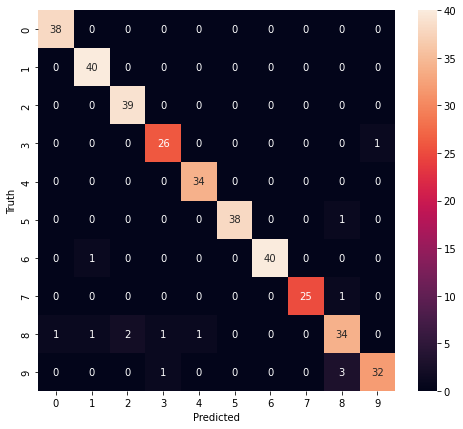

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(8,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

enter which number you want to print in image5
5


<Figure size 432x288 with 0 Axes>

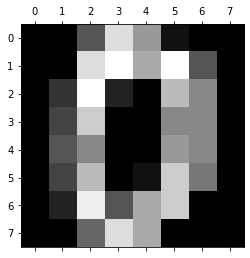

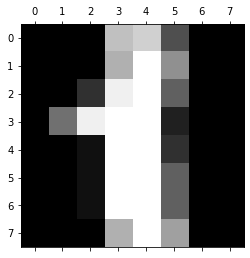

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
a=print(int(input("enter which number you want to print in image")))
for i in range(2):   
    plt.matshow(digits.images[i])

In [22]:
result =model.predict(digits.data[14:15,:].reshape(1, -1)) 

In [23]:
result

array([4])